### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light_mid_changeBp0.995"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.375
ma1_Shape2 = fn.input()[0] > 0.625
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.375) & (fn.input()[0] <= 0.625)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


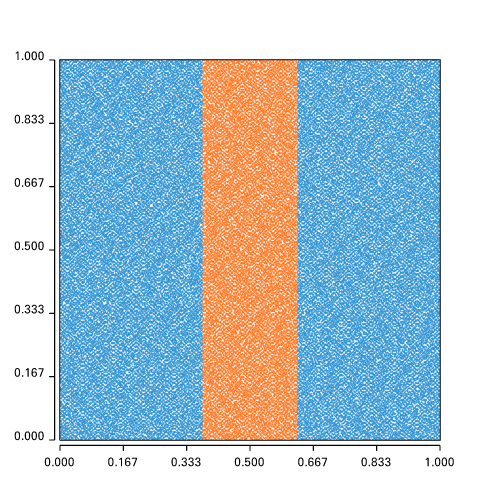

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  0.95


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 0.995

In [7]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [8]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002236 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29244e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001403 secs 
  RHS V Solve:            = 0.003286 secs / 7 its
  Pressure Solve:         = 0.101 secs / 27 its
  Final V Solve:          = 0.007762 secs / 7 its

  Total BSSCR Linear solve time: 0.126133 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.278386e-01 (secs)
Time Integration
	2nd order:      

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0738 [min] /    0.0738 [max] (secs)
Time Integration - 0.0738253 [min] / 0.0738253 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.213317e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-03 07:56:12)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002299 seconds

SROpGenerator_SimpleFinestLevel: time = 1.08120e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001156 secs 
  RHS V Solve:            = 0.003112 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002195 seconds

SROpGenerator_SimpleFinestLevel: time = 1.08441e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001163 secs 
  RHS V Solve:            = 0.003183 secs / 7 its
  Pressure Solve:         = 0.08637 secs / 28 its
  Final V Solve:          = 0.002966 secs / 7 its

  Total BSSCR Linear solve time: 0.104690 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.049522e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0736 [min] /    0.0736 [max] (secs)
Time Integration - 0.0736746 [min] / 0.0736746 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.400812e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-03 07:56:25)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002261 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11407e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001205 secs 
  RHS V Solve:            = 0.003199 secs / 7 its
  Pressure Solve:         = 0.08898 secs / 28 its
  Final V Solve:          = 0.003103 secs / 7 its

  Total BSSCR Linear solve time: 0.107643 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.079830e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0696 [min] /    0.0696 [max] (secs)
Time Integration - 0.0696045 [min] / 0.0696045 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.248403e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-03 07:56:30)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002295 seconds

SROpGenerator_SimpleFinestLevel: time = 1.06971e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001149 secs 
  RHS V Solve:            = 0.003064 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002314 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10067e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001184 secs 
  RHS V Solve:            = 0.00308 secs / 7 its
  Pressure Solve:         = 0.08798 secs / 28 its
  Final V Solve:          = 0.002965 secs / 7 its

  Total BSSCR Linear solve time: 0.106552 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.068335e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0725 [min] /    0.0725 [max] (secs)
Time Integration - 0.0724998 [min] / 0.0724998 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.200210e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-03 07:56:43)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002230 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11701e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001196 secs 
  RHS V Solve:            = 0.003195 secs / 7 its
  Pressure Solve:         = 0.08736 secs / 28 its
  Final V Solve:          = 0.003016 secs / 7 its

  Total BSSCR Linear solve time: 0.105783 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.060917e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0776 [min] /    0.0776 [max] (secs)
Time Integration - 0.0776712 [min] / 0.0776712 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.452914e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-03 07:56:48)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002279 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11757e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001203 secs 
  RHS V Solve:            = 0.003412 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002276 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14672e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00124 secs 
  RHS V Solve:            = 0.003339 secs / 7 its
  Pressure Solve:         = 0.09546 secs / 28 its
  Final V Solve:          = 0.003187 secs / 7 its

  Total BSSCR Linear solve time: 0.114740 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.150157e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0782 [min] /    0.0782 [max] (secs)
Time Integration - 0.078194 [min] / 0.078194 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.443904e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-03 07:57:01)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002269 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13719e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001218 secs 
  RHS V Solve:            = 0.003186 secs / 7 its
  Pressure Solve:         = 0.08791 secs / 28 its
  Final V Solve:          = 0.003141 secs / 7 its

  Total BSSCR Linear solve time: 0.106558 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.068240e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780617 [min] / 0.0780617 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.429378e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-03 07:57:06)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002225 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18333e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001265 secs 
  RHS V Solve:            = 0.003485 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002220 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11099e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001192 secs 
  RHS V Solve:            = 0.003357 secs / 7 its
  Pressure Solve:         = 0.09409 secs / 28 its
  Final V Solve:          = 0.003283 secs / 7 its

  Total BSSCR Linear solve time: 0.113264 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.135834e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0783 [min] /    0.0783 [max] (secs)
Time Integration - 0.0782984 [min] / 0.0782984 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.434019e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-03 07:57:19)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002405 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20972e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001318 secs 
  RHS V Solve:            = 0.003352 secs / 7 its
  Pressure Solve:         = 0.09038 secs / 28 its
  Final V Solve:          = 0.003125 secs / 7 its

  Total BSSCR Linear solve time: 0.109727 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.100405e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0791 [min] /    0.0791 [max] (secs)
Time Integration - 0.079144 [min] / 0.079144 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.442941e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-03 07:57:24)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002169 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17552e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00126 secs 
  RHS V Solve:            = 0.003193 secs / 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002278 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10822e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001211 secs 
  RHS V Solve:            = 0.003217 secs / 7 its
  Pressure Solve:         = 0.08931 secs / 28 its
  Final V Solve:          = 0.003118 secs / 7 its

  Total BSSCR Linear solve time: 0.107873 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.081670e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0791 [min] /    0.0791 [max] (secs)
Time Integration - 0.0791007 [min] / 0.0791007 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.269804e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-03 07:57:39)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002481 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26607e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001357 secs 
  RHS V Solve:            = 0.003453 secs / 7 its
  Pressure Solve:         = 0.09656 secs / 28 its
  Final V Solve:          = 0.003427 secs / 7 its

  Total 

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0983 [min] /    0.0983 [max] (secs)
Time Integration - 0.0982977 [min] / 0.0982977 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.998094e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-03 07:57:45)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002651 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32298e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00142 secs 
  RHS V Solve:            = 0.005088 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002945 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42051e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.004031 secs / 7 its
  Pressure Solve:         = 0.1076 secs / 28 its
  Final V Solve:          = 0.003414 secs / 7 its

  Total BSSCR Linear solve time: 0.130290 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.306242e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0757 [min] /    0.0757 [max] (secs)
Time Integration - 0.0757485 [min] / 0.0757485 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.369146e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-03 07:58:01)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002525 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24457e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001349 secs 
  RHS V Solve:            = 0.004972 secs / 8 its
  Pressure Solve:         = 0.1014 secs / 28 its
  Final V Solve:          = 0.003613 secs / 7 its

  Total BSSCR Linear solve time: 0.124015 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.243675e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0740 [min] /    0.0740 [max] (secs)
Time Integration - 0.0739881 [min] / 0.0739881 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.353618e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-03 07:58:06)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002777 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33638e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.00395 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002452 seconds

SROpGenerator_SimpleFinestLevel: time = 1.15168e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001247 secs 
  RHS V Solve:            = 0.003447 secs / 8 its
  Pressure Solve:         = 0.08853 secs / 28 its
  Final V Solve:          = 0.00302 secs / 7 its

  Total BSSCR Linear solve time: 0.107668 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.079837e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0727 [min] /    0.0727 [max] (secs)
Time Integration - 0.0727712 [min] / 0.0727712 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.098646e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-03 07:58:20)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002193 seconds

SROpGenerator_SimpleFinestLevel: time = 1.07616e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00116 secs 
  RHS V Solve:            = 0.003788 secs / 8 its
  Pressure Solve:         = 0.0938 secs / 28 its
  Final V Solve:          = 0.003382 secs / 7 its

  Total BSSCR Linear solve time: 0.113410 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.137395e-01 (secs)
Time Integration
	2nd order:                 XAU5T

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0821 [min] /    0.0821 [max] (secs)
Time Integration - 0.082133 [min] / 0.082133 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.527676e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-03 07:58:26)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002310 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21084e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0013 secs 
  RHS V Solve:            = 0.004494 secs / 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002122 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12328e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001244 secs 
  RHS V Solve:            = 0.003629 secs / 8 its
  Pressure Solve:         = 0.09578 secs / 28 its
  Final V Solve:          = 0.003089 secs / 7 its

  Total BSSCR Linear solve time: 0.114800 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.151783e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0765 [min] /    0.0765 [max] (secs)
Time Integration - 0.0765313 [min] / 0.0765313 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.275023e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-03 07:58:41)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002363 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17649e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001264 secs 
  RHS V Solve:            = 0.0036 secs / 8 its
  Pressure Solve:         = 0.09021 secs / 28 its
  Final V Solve:          = 0.003187 secs / 7 its

  Total BSSCR Linear solve time: 0.109939 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.102337e-01 (secs)
Time Integration
	2nd order:                 XAU5T

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0757 [min] /    0.0757 [max] (secs)
Time Integration - 0.0756998 [min] / 0.0756998 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.289957e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-03 07:58:45)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002347 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29371e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.003732 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002527 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27802e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001383 secs 
  RHS V Solve:            = 0.004034 secs / 8 its
  Pressure Solve:         = 0.09694 secs / 28 its
  Final V Solve:          = 0.003408 secs / 7 its

  Total BSSCR Linear solve time: 0.118299 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.186981e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0818 [min] /    0.0818 [max] (secs)
Time Integration - 0.0818285 [min] / 0.0818285 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.481329e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-03 07:58:59)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002140 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12737e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001207 secs 
  RHS V Solve:            = 0.003579 secs / 8 its
  Pressure Solve:         = 0.08952 secs / 28 its
  Final V Solve:          = 0.003136 secs / 7 its

  Total BSSCR Linear solve time: 0.108482 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.088213e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0761 [min] /    0.0761 [max] (secs)
Time Integration - 0.0761776 [min] / 0.0761776 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.352540e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-03 07:59:04)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002333 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18713e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001282 secs 
  RHS V Solve:            = 0.004002 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002389 seconds

SROpGenerator_SimpleFinestLevel: time = 1.85416e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001996 secs 
  RHS V Solve:            = 0.00377 secs / 8 its
  Pressure Solve:         = 0.0925 secs / 28 its
  Final V Solve:          = 0.003392 secs / 7 its

  Total BSSCR Linear solve time: 0.113771 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.140838e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0765 [min] /    0.0765 [max] (secs)
Time Integration - 0.0765036 [min] / 0.0765036 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.496941e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-03 07:59:17)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002281 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20313e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00129 secs 
  RHS V Solve:            = 0.003839 secs / 8 its
  Pressure Solve:         = 0.09469 secs / 28 its
  Final V Solve:          = 0.003337 secs / 7 its

  Total BSSCR Linear solve time: 0.114698 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.150414e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0754 [min] /    0.0754 [max] (secs)
Time Integration - 0.0754077 [min] / 0.0754077 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.388364e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-03 07:59:22)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002278 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14152e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001231 secs 
  RHS V Solve:            = 0.003775 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002274 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12479e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001207 secs 
  RHS V Solve:            = 0.003925 secs / 8 its
  Pressure Solve:         = 0.08834 secs / 28 its
  Final V Solve:          = 0.003111 secs / 7 its

  Total BSSCR Linear solve time: 0.107617 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.079471e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0824 [min] /    0.0824 [max] (secs)
Time Integration - 0.0824729 [min] / 0.0824729 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.654347e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-03 07:59:35)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002353 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17508e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001264 secs 
  RHS V Solve:            = 0.0037 secs / 8 its
  Pressure Solve:         = 0.09129 secs / 28 its
  Final V Solve:          = 0.00342 secs / 7 its

  Total BSSCR Linear solve time: 0.111397 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.117415e-01 (secs)
Time Integration
	2nd order:                 XAU5TR

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0761 [min] /    0.0761 [max] (secs)
Time Integration - 0.07616 [min] / 0.07616 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.409835e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-03 07:59:40)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002262 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21966e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001318 secs 
  RHS V Solve:            = 0.003863 secs / 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002097 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09284e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001174 secs 
  RHS V Solve:            = 0.003634 secs / 8 its
  Pressure Solve:         = 0.08836 secs / 28 its
  Final V Solve:          = 0.003053 secs / 7 its

  Total BSSCR Linear solve time: 0.107156 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.075153e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0760 [min] /    0.0760 [max] (secs)
Time Integration - 0.076051 [min] / 0.076051 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.313081e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-03 07:59:53)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002266 seconds

SROpGenerator_SimpleFinestLevel: time = 1.15923e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001245 secs 
  RHS V Solve:            = 0.0039 secs / 8 its
  Pressure Solve:         = 0.09571 secs / 28 its
  Final V Solve:          = 0.003288 secs / 7 its

  Total BSSCR Linear solve time: 0.115610 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.159243e-01 (secs)
Time Integration
	2nd order:                 XAU5T

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825379 [min] / 0.0825379 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.120872e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-03 07:59:58)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002295 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19207e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00128 secs 
  RHS V Solve:            = 0.003952 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002593 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35331e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001454 secs 
  RHS V Solve:            = 0.004066 secs / 8 its
  Pressure Solve:         = 0.09664 secs / 28 its
  Final V Solve:          = 0.003397 secs / 7 its

  Total BSSCR Linear solve time: 0.118155 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.184836e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0819 [min] /    0.0819 [max] (secs)
Time Integration - 0.0819615 [min] / 0.0819615 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.576525e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-03 08:00:12)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002593 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26099e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001354 secs 
  RHS V Solve:            = 0.004203 secs / 8 its
  Pressure Solve:         = 0.09652 secs / 28 its
  Final V Solve:          = 0.003339 secs / 7 its

  Total BSSCR Linear solve time: 0.118021 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.183480e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0759 [min] /    0.0759 [max] (secs)
Time Integration - 0.0759442 [min] / 0.0759442 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.285112e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-03 08:00:17)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002396 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23378e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001322 secs 
  RHS V Solve:            = 0.003629 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002305 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17534e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001272 secs 
  RHS V Solve:            = 0.003951 secs / 8 its
  Pressure Solve:         = 0.0945 secs / 28 its
  Final V Solve:          = 0.003434 secs / 7 its

  Total BSSCR Linear solve time: 0.114821 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.151772e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0827256 [min] / 0.0827256 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.501654e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-03 08:00:30)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002491 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29809e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00141 secs 
  RHS V Solve:            = 0.004111 secs / 8 its
  Pressure Solve:         = 0.09662 secs / 28 its
  Final V Solve:          = 0.0034 secs / 7 its

  Total BSSCR Linear solve time: 0.118056 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.184106e-01 (secs)
Time Integration
	2nd order:                 XAU5TR

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0858 [min] /    0.0858 [max] (secs)
Time Integration - 0.0858578 [min] / 0.0858578 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.597438e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-03 08:00:35)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002595 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27995e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.003968 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002645 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25132e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001341 secs 
  RHS V Solve:            = 0.003921 secs / 8 its
  Pressure Solve:         = 0.09646 secs / 28 its
  Final V Solve:          = 0.003424 secs / 7 its

  Total BSSCR Linear solve time: 0.117979 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.183111e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825528 [min] / 0.0825528 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.167877e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-03 08:00:49)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002353 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19435e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001293 secs 
  RHS V Solve:            = 0.003765 secs / 8 its
  Pressure Solve:         = 0.09154 secs / 28 its
  Final V Solve:          = 0.003191 secs / 7 its

  Total BSSCR Linear solve time: 0.111337 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.116592e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0827971 [min] / 0.0827971 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.495888e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-03 08:00:54)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002544 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30954e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001414 secs 
  RHS V Solve:            = 0.004118 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002519 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29760e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00139 secs 
  RHS V Solve:            = 0.003961 secs / 8 its
  Pressure Solve:         = 0.097 secs / 28 its
  Final V Solve:          = 0.003339 secs / 7 its

  Total BSSCR Linear solve time: 0.118313 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.186747e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0819 [min] /    0.0819 [max] (secs)
Time Integration - 0.081988 [min] / 0.081988 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.472597e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-03 08:01:07)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002394 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21101e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001307 secs 
  RHS V Solve:            = 0.003797 secs / 8 its
  Pressure Solve:         = 0.09262 secs / 28 its
  Final V Solve:          = 0.003096 secs / 7 its

  Total BSSCR Linear solve time: 0.112591 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.129392e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0764 [min] /    0.0764 [max] (secs)
Time Integration - 0.076431 [min] / 0.076431 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.069598e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-03 08:01:12)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002512 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38581e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.004041 secs 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002288 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20261e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001298 secs 
  RHS V Solve:            = 0.003295 secs / 7 its
  Pressure Solve:         = 0.1002 secs / 29 its
  Final V Solve:          = 0.003238 secs / 7 its

  Total BSSCR Linear solve time: 0.119791 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.201222e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0775 [min] /    0.0775 [max] (secs)
Time Integration - 0.0774967 [min] / 0.0774967 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.414633e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-03 08:01:25)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002401 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16486e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001265 secs 
  RHS V Solve:            = 0.003382 secs / 7 its
  Pressure Solve:         = 0.09943 secs / 29 its
  Final V Solve:          = 0.003273 secs / 7 its

  Total BSSCR Linear solve time: 0.119247 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.195883e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0765 [min] /    0.0765 [max] (secs)
Time Integration - 0.0765225 [min] / 0.0765225 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.360406e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-03 08:01:30)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002509 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16565e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001251 secs 
  RHS V Solve:            = 0.003322 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002364 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19184e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001282 secs 
  RHS V Solve:            = 0.0034 secs / 7 its
  Pressure Solve:         = 0.09468 secs / 29 its
  Final V Solve:          = 0.003152 secs / 7 its

  Total BSSCR Linear solve time: 0.114211 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.145401e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0765 [min] /    0.0765 [max] (secs)
Time Integration - 0.0765392 [min] / 0.0765392 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.422159e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-03 08:01:44)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002573 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30344e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001404 secs 
  RHS V Solve:            = 0.003625 secs / 7 its
  Pressure Solve:         = 0.1001 secs / 29 its
  Final V Solve:          = 0.003229 secs / 7 its

  Total BSSCR Linear solve time: 0.120874 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.212389e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.083215 [min] / 0.083215 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.501660e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-03 08:01:49)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002502 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29021e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001394 secs 
  RHS V Solve:            = 0.003648 secs 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002633 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28680e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001383 secs 
  RHS V Solve:            = 0.003737 secs / 7 its
  Pressure Solve:         = 0.1004 secs / 29 its
  Final V Solve:          = 0.003295 secs / 7 its

  Total BSSCR Linear solve time: 0.121493 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.218722e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0826985 [min] / 0.0826985 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.445612e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-03 08:02:03)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002338 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17794e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001267 secs 
  RHS V Solve:            = 0.003555 secs / 7 its
  Pressure Solve:         = 0.09975 secs / 29 its
  Final V Solve:          = 0.003406 secs / 7 its

  Total BSSCR Linear solve time: 0.119609 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.199533e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0824954 [min] / 0.0824954 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.619444e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-03 08:02:08)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002100 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17287e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001256 secs 
  RHS V Solve:            = 0.003311 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002623 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30144e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.003528 secs / 7 its
  Pressure Solve:         = 0.1004 secs / 29 its
  Final V Solve:          = 0.003478 secs / 7 its

  Total BSSCR Linear solve time: 0.121452 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.218522e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840186 [min] / 0.0840186 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.603599e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-03 08:02:21)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002378 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16868e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001256 secs 
  RHS V Solve:            = 0.003415 secs / 7 its
  Pressure Solve:         = 0.09295 secs / 29 its
  Final V Solve:          = 0.003074 secs / 7 its

  Total BSSCR Linear solve time: 0.112374 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.127363e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0827806 [min] / 0.0827806 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.634630e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-03 08:02:26)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002519 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35631e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001461 secs 
  RHS V Solve:            = 0.00356 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002352 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24008e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00133 secs 
  RHS V Solve:            = 0.003356 secs / 7 its
  Pressure Solve:         = 0.09973 secs / 29 its
  Final V Solve:          = 0.003317 secs / 7 its

  Total BSSCR Linear solve time: 0.119629 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.200058e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914003 [min] / 0.0914003 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.643285e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-03 08:02:40)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002407 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18593e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001283 secs 
  RHS V Solve:            = 0.003428 secs / 7 its
  Pressure Solve:         = 0.09217 secs / 28 its
  Final V Solve:          = 0.00316 secs / 7 its

  Total BSSCR Linear solve time: 0.111962 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.123449e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0834 [min] /    0.0834 [max] (secs)
Time Integration - 0.0834218 [min] / 0.0834218 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.559114e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-03 08:02:45)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002108 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09080e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00118 secs 
  RHS V Solve:            = 0.003133 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002533 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30271e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.003465 secs / 7 its
  Pressure Solve:         = 0.09674 secs / 28 its
  Final V Solve:          = 0.003481 secs / 7 its

  Total BSSCR Linear solve time: 0.117742 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.181327e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0828243 [min] / 0.0828243 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.571070e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-03 08:02:58)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002635 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26876e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001373 secs 
  RHS V Solve:            = 0.003697 secs / 7 its
  Pressure Solve:         = 0.0971 secs / 28 its
  Final V Solve:          = 0.003541 secs / 7 its

  Total BSSCR Linear solve time: 0.118324 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.186905e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0765 [min] /    0.0765 [max] (secs)
Time Integration - 0.0765391 [min] / 0.0765391 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.348317e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-03 08:03:03)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002364 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18697e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001296 secs 
  RHS V Solve:            = 0.003504 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002403 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18947e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001278 secs 
  RHS V Solve:            = 0.003325 secs / 7 its
  Pressure Solve:         = 0.09116 secs / 28 its
  Final V Solve:          = 0.003119 secs / 7 its

  Total BSSCR Linear solve time: 0.110707 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.110774e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830332 [min] / 0.0830332 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.881056e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-03 08:03:17)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002204 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12565e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001206 secs 
  RHS V Solve:            = 0.003306 secs / 7 its
  Pressure Solve:         = 0.08867 secs / 28 its
  Final V Solve:          = 0.003152 secs / 7 its

  Total BSSCR Linear solve time: 0.107421 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.077937e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0773 [min] /    0.0773 [max] (secs)
Time Integration - 0.0772857 [min] / 0.0772857 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.472643e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-03 08:03:22)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002334 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22736e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001316 secs 
  RHS V Solve:            = 0.003415 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002406 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19264e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001293 secs 
  RHS V Solve:            = 0.003333 secs / 7 its
  Pressure Solve:         = 0.09142 secs / 28 its
  Final V Solve:          = 0.003129 secs / 7 its

  Total BSSCR Linear solve time: 0.111039 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.114672e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0832632 [min] / 0.0832632 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.536391e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-03 08:03:35)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002611 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27471e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001369 secs 
  RHS V Solve:            = 0.003714 secs / 7 its
  Pressure Solve:         = 0.09716 secs / 28 its
  Final V Solve:          = 0.003467 secs / 7 its

  Total BSSCR Linear solve time: 0.118327 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.187270e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843571 [min] / 0.0843571 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.571372e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-03 08:03:40)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002367 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12926e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001214 secs 
  RHS V Solve:            = 0.003325 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002331 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14852e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001236 secs 
  RHS V Solve:            = 0.003468 secs / 7 its
  Pressure Solve:         = 0.09576 secs / 28 its
  Final V Solve:          = 0.003335 secs / 7 its

  Total BSSCR Linear solve time: 0.115572 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.159351e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0832029 [min] / 0.0832029 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.628965e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-03 08:03:54)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002525 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31983e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.003576 secs / 7 its
  Pressure Solve:         = 0.0964 secs / 28 its
  Final V Solve:          = 0.003259 secs / 7 its

  Total BSSCR Linear solve time: 0.117463 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.178829e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842373 [min] / 0.0842373 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.561608e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-03 08:03:59)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002701 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28551e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001378 secs 
  RHS V Solve:            = 0.003555 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002357 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17077e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001259 secs 
  RHS V Solve:            = 0.003356 secs / 7 its
  Pressure Solve:         = 0.09271 secs / 28 its
  Final V Solve:          = 0.003366 secs / 7 its

  Total BSSCR Linear solve time: 0.112714 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.131385e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0815 [min] /    0.0815 [max] (secs)
Time Integration - 0.081553 [min] / 0.081553 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.381190e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-03 08:04:12)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002376 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16799e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001256 secs 
  RHS V Solve:            = 0.003499 secs / 7 its
  Pressure Solve:         = 0.09626 secs / 28 its
  Final V Solve:          = 0.003319 secs / 7 its

  Total BSSCR Linear solve time: 0.116252 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.166490e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0784 [min] /    0.0784 [max] (secs)
Time Integration - 0.078417 [min] / 0.078417 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.494307e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-03 08:04:17)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002464 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26378e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.003537 secs /

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002567 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40599e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001502 secs 
  RHS V Solve:            = 0.003654 secs / 7 its
  Pressure Solve:         = 0.09773 secs / 28 its
  Final V Solve:          = 0.003389 secs / 7 its

  Total BSSCR Linear solve time: 0.118905 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.193001e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.084469 [min] / 0.084469 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.573501e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-03 08:04:31)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002164 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10308e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001182 secs 
  RHS V Solve:            = 0.003206 secs / 7 its
  Pressure Solve:         = 0.08955 secs / 28 its
  Final V Solve:          = 0.003287 secs / 7 its

  Total BSSCR Linear solve time: 0.108295 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.086848e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843572 [min] / 0.0843572 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.208770e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-03 08:04:36)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002354 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17755e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001267 secs 
  RHS V Solve:            = 0.003514 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002654 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27100e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001365 secs 
  RHS V Solve:            = 0.003543 secs / 7 its
  Pressure Solve:         = 0.09818 secs / 28 its
  Final V Solve:          = 0.003531 secs / 7 its

  Total BSSCR Linear solve time: 0.119792 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.201920e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0847 [min] /    0.0847 [max] (secs)
Time Integration - 0.0847014 [min] / 0.0847014 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.716992e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-03 08:04:50)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002577 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25989e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001354 secs 
  RHS V Solve:            = 0.00371 secs / 7 its
  Pressure Solve:         = 0.0975 secs / 28 its
  Final V Solve:          = 0.003482 secs / 7 its

  Total BSSCR Linear solve time: 0.118741 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.191489e-01 (secs)
Time Integration
	2nd order:                 XAU5T

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0781 [min] /    0.0781 [max] (secs)
Time Integration - 0.0781702 [min] / 0.0781702 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.452746e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-03 08:04:55)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002366 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20238e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001305 secs 
  RHS V Solve:            = 0.003599 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002155 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12157e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001213 secs 
  RHS V Solve:            = 0.003312 secs / 7 its
  Pressure Solve:         = 0.08977 secs / 28 its
  Final V Solve:          = 0.00303 secs / 7 its

  Total BSSCR Linear solve time: 0.108411 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.088032e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846691 [min] / 0.0846691 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.657871e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-03 08:05:09)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002626 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28840e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001383 secs 
  RHS V Solve:            = 0.003603 secs / 7 its
  Pressure Solve:         = 0.09758 secs / 28 its
  Final V Solve:          = 0.003281 secs / 7 its

  Total BSSCR Linear solve time: 0.118620 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.190592e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825319 [min] / 0.0825319 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.761588e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-03 08:05:14)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002151 seconds

SROpGenerator_SimpleFinestLevel: time = 1.05429e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001138 secs 
  RHS V Solve:            = 0.003119 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002563 seconds

SROpGenerator_SimpleFinestLevel: time = 2.32648e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002439 secs 
  RHS V Solve:            = 0.003529 secs / 7 its
  Pressure Solve:         = 0.09725 secs / 28 its
  Final V Solve:          = 0.003375 secs / 7 its

  Total BSSCR Linear solve time: 0.119257 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.197065e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0776 [min] /    0.0776 [max] (secs)
Time Integration - 0.0776123 [min] / 0.0776123 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.459206e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-03 08:05:27)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002630 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23525e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00134 secs 
  RHS V Solve:            = 0.003565 secs / 7 its
  Pressure Solve:         = 0.0979 secs / 28 its
  Final V Solve:          = 0.003617 secs / 7 its

  Total BSSCR Linear solve time: 0.119042 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.194543e-01 (secs)
Time Integration
	2nd order:                 XAU5T

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838719 [min] / 0.0838719 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.679051e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-03 08:05:32)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002134 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13366e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001224 secs 
  RHS V Solve:            = 0.003075 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002345 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19836e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001287 secs 
  RHS V Solve:            = 0.003383 secs / 7 its
  Pressure Solve:         = 0.09293 secs / 28 its
  Final V Solve:          = 0.003385 secs / 7 its

  Total BSSCR Linear solve time: 0.112978 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.133986e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780647 [min] / 0.0780647 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.415549e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-03 08:05:46)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002615 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27503e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001391 secs 
  RHS V Solve:            = 0.003621 secs / 7 its
  Pressure Solve:         = 0.09885 secs / 28 its
  Final V Solve:          = 0.003381 secs / 7 its

  Total BSSCR Linear solve time: 0.120216 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.206444e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844064 [min] / 0.0844064 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.589545e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-03 08:05:51)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002565 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31051e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001406 secs 
  RHS V Solve:            = 0.003644 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002112 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12256e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001205 secs 
  RHS V Solve:            = 0.003258 secs / 7 its
  Pressure Solve:         = 0.09032 secs / 28 its
  Final V Solve:          = 0.003178 secs / 7 its

  Total BSSCR Linear solve time: 0.108986 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.094263e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0776935 [min] / 0.0776935 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.156293e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-03 08:06:05)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002325 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21031e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001299 secs 
  RHS V Solve:            = 0.003371 secs / 7 its
  Pressure Solve:         = 0.09278 secs / 28 its
  Final V Solve:          = 0.003394 secs / 7 its

  Total BSSCR Linear solve time: 0.112758 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.131686e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843459 [min] / 0.0843459 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.546269e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-03 08:06:10)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002601 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30510e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001404 secs 
  RHS V Solve:            = 0.003881 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002550 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28162e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.0036 secs / 7 its
  Pressure Solve:         = 0.09824 secs / 28 its
  Final V Solve:          = 0.00328 secs / 7 its

  Total BSSCR Linear solve time: 0.119382 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.198291e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837473 [min] / 0.0837473 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.588018e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-03 08:06:24)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002135 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11265e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001208 secs 
  RHS V Solve:            = 0.003158 secs / 7 its
  Pressure Solve:         = 0.08919 secs / 28 its
  Final V Solve:          = 0.003149 secs / 7 its

  Total BSSCR Linear solve time: 0.107702 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.080749e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0831993 [min] / 0.0831993 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.597628e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-03 08:06:29)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002563 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28395e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001411 secs 
  RHS V Solve:            = 0.003504 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002655 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28726e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.003664 secs / 7 its
  Pressure Solve:         = 0.09789 secs / 28 its
  Final V Solve:          = 0.003298 secs / 7 its

  Total BSSCR Linear solve time: 0.119066 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.194793e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844196 [min] / 0.0844196 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.621538e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-03 08:06:43)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002371 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20557e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001297 secs 
  RHS V Solve:            = 0.003505 secs / 7 its
  Pressure Solve:         = 0.09267 secs / 28 its
  Final V Solve:          = 0.003183 secs / 7 its

  Total BSSCR Linear solve time: 0.112768 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.131949e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838346 [min] / 0.0838346 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.572329e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-03 08:06:47)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002090 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17578e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001297 secs 
  RHS V Solve:            = 0.003315 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002192 seconds

SROpGenerator_SimpleFinestLevel: time = 1.07589e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001158 secs 
  RHS V Solve:            = 0.003102 secs / 7 its
  Pressure Solve:         = 0.08986 secs / 28 its
  Final V Solve:          = 0.003131 secs / 7 its

  Total BSSCR Linear solve time: 0.108222 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.085927e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780489 [min] / 0.0780489 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.603700e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-03 08:07:01)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002496 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29192e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001433 secs 
  RHS V Solve:            = 0.003638 secs / 7 its
  Pressure Solve:         = 0.09802 secs / 28 its
  Final V Solve:          = 0.00348 secs / 7 its

  Total BSSCR Linear solve time: 0.119378 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.198676e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0777309 [min] / 0.0777309 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.491185e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-03 08:07:06)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002436 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17340e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001263 secs 
  RHS V Solve:            = 0.003403 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002383 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27136e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001375 secs 
  RHS V Solve:            = 0.0034 secs / 7 its
  Pressure Solve:         = 0.09171 secs / 28 its
  Final V Solve:          = 0.003313 secs / 7 its

  Total BSSCR Linear solve time: 0.111773 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.121986e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.0848403 [min] / 0.0848403 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.602597e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-03 08:07:20)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002483 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22810e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00132 secs 
  RHS V Solve:            = 0.003503 secs / 7 its
  Pressure Solve:         = 0.09796 secs / 28 its
  Final V Solve:          = 0.003647 secs / 7 its

  Total BSSCR Linear solve time: 0.118832 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.193361e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0779 [min] /    0.0779 [max] (secs)
Time Integration - 0.077908 [min] / 0.077908 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.469369e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-03 08:07:25)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002388 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19552e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001301 secs 
  RHS V Solve:            = 0.003423 secs 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002398 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19193e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001278 secs 
  RHS V Solve:            = 0.003584 secs / 7 its
  Pressure Solve:         = 0.09741 secs / 28 its
  Final V Solve:          = 0.003454 secs / 7 its

  Total BSSCR Linear solve time: 0.117640 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.180552e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840326 [min] / 0.0840326 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.542696e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-03 08:07:39)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002480 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21200e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001303 secs 
  RHS V Solve:            = 0.003652 secs / 7 its
  Pressure Solve:         = 0.09335 secs / 28 its
  Final V Solve:          = 0.003236 secs / 7 its

  Total BSSCR Linear solve time: 0.113584 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.140015e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843582 [min] / 0.0843582 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.767706e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-03 08:07:44)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002641 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27992e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001393 secs 
  RHS V Solve:            = 0.003634 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002386 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20148e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001304 secs 
  RHS V Solve:            = 0.003442 secs / 7 its
  Pressure Solve:         = 0.09367 secs / 28 its
  Final V Solve:          = 0.003253 secs / 7 its

  Total BSSCR Linear solve time: 0.113644 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.140718e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0779999 [min] / 0.0779999 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.516873e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-03 08:07:57)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002372 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24270e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001335 secs 
  RHS V Solve:            = 0.00354 secs / 7 its
  Pressure Solve:         = 0.09332 secs / 28 its
  Final V Solve:          = 0.003249 secs / 7 its

  Total BSSCR Linear solve time: 0.113461 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.139253e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0793 [min] /    0.0793 [max] (secs)
Time Integration - 0.079312 [min] / 0.079312 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.491719e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-03 08:08:03)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002416 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24612e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001334 secs 
  RHS V Solve:            = 0.00351 secs /

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002597 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30815e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001407 secs 
  RHS V Solve:            = 0.00362 secs / 7 its
  Pressure Solve:         = 0.09779 secs / 28 its
  Final V Solve:          = 0.003509 secs / 7 its

  Total BSSCR Linear solve time: 0.119248 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.196926e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0788 [min] /    0.0788 [max] (secs)
Time Integration - 0.0788007 [min] / 0.0788007 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.484366e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-03 08:08:16)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002331 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10422e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001187 secs 
  RHS V Solve:            = 0.003138 secs / 7 its
  Pressure Solve:         = 0.08972 secs / 28 its
  Final V Solve:          = 0.003392 secs / 7 its

  Total BSSCR Linear solve time: 0.108691 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.090836e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0778 [min] /    0.0778 [max] (secs)
Time Integration - 0.0778693 [min] / 0.0778693 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.129952e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-03 08:08:21)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002169 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11119e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001195 secs 
  RHS V Solve:            = 0.003201 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002126 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09307e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001175 secs 
  RHS V Solve:            = 0.00329 secs / 7 its
  Pressure Solve:         = 0.09011 secs / 28 its
  Final V Solve:          = 0.003048 secs / 7 its

  Total BSSCR Linear solve time: 0.108682 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.091046e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843164 [min] / 0.0843164 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.192143e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-03 08:08:35)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002578 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36678e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001481 secs 
  RHS V Solve:            = 0.003567 secs / 7 its
  Pressure Solve:         = 0.09835 secs / 28 its
  Final V Solve:          = 0.003668 secs / 7 its

  Total BSSCR Linear solve time: 0.119946 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.203974e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843518 [min] / 0.0843518 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.630648e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-03 08:08:40)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002598 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34671e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001447 secs 
  RHS V Solve:            = 0.003606 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002212 seconds

SROpGenerator_SimpleFinestLevel: time = 1.15385e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001237 secs 
  RHS V Solve:            = 0.003157 secs / 7 its
  Pressure Solve:         = 0.09055 secs / 28 its
  Final V Solve:          = 0.003245 secs / 7 its

  Total BSSCR Linear solve time: 0.109207 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.096601e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780061 [min] / 0.0780061 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.519533e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-03 08:08:54)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002355 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22551e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001315 secs 
  RHS V Solve:            = 0.003516 secs / 7 its
  Pressure Solve:         = 0.09171 secs / 28 its
  Final V Solve:          = 0.003415 secs / 7 its

  Total BSSCR Linear solve time: 0.111848 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.122967e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780563 [min] / 0.0780563 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.167084e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-03 08:08:59)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002567 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30010e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001396 secs 
  RHS V Solve:            = 0.003675 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002206 seconds

SROpGenerator_SimpleFinestLevel: time = 1.08832e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001171 secs 
  RHS V Solve:            = 0.003091 secs / 7 its
  Pressure Solve:         = 0.08943 secs / 28 its
  Final V Solve:          = 0.00337 secs / 7 its

  Total BSSCR Linear solve time: 0.108047 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.084852e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0786 [min] /    0.0786 [max] (secs)
Time Integration - 0.0786732 [min] / 0.0786732 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.189386e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-03 08:09:12)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002506 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35978e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.003645 secs / 7 its
  Pressure Solve:         = 0.09782 secs / 28 its
  Final V Solve:          = 0.00345 secs / 7 its

  Total BSSCR Linear solve time: 0.119180 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.196286e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0786 [min] /    0.0786 [max] (secs)
Time Integration - 0.0786257 [min] / 0.0786257 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.521703e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-03 08:09:17)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002470 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19690e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001286 secs 
  RHS V Solve:            = 0.003401 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002570 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33308e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001428 secs 
  RHS V Solve:            = 0.00374 secs / 7 its
  Pressure Solve:         = 0.09809 secs / 28 its
  Final V Solve:          = 0.003492 secs / 7 its

  Total BSSCR Linear solve time: 0.119459 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.199123e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0785 [min] /    0.0785 [max] (secs)
Time Integration - 0.0785374 [min] / 0.0785374 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.506800e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-03 08:09:31)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002478 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19340e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00131 secs 
  RHS V Solve:            = 0.003368 secs / 7 its
  Pressure Solve:         = 0.09361 secs / 28 its
  Final V Solve:          = 0.003322 secs / 7 its

  Total BSSCR Linear solve time: 0.113797 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.142445e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0863 [min] /    0.0863 [max] (secs)
Time Integration - 0.0863635 [min] / 0.0863635 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.751333e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-03 08:09:36)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002297 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13244e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001217 secs 
  RHS V Solve:            = 0.003301 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002558 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30306e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.003692 secs / 7 its
  Pressure Solve:         = 0.09946 secs / 28 its
  Final V Solve:          = 0.003504 secs / 7 its

  Total BSSCR Linear solve time: 0.121111 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.215848e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0851 [min] /    0.0851 [max] (secs)
Time Integration - 0.085173 [min] / 0.085173 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.814461e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-03 08:09:50)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002420 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16852e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001281 secs 
  RHS V Solve:            = 0.003485 secs / 7 its
  Pressure Solve:         = 0.09468 secs / 28 its
  Final V Solve:          = 0.003202 secs / 7 its

  Total BSSCR Linear solve time: 0.114875 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.153113e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844696 [min] / 0.0844696 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.645025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-03 08:09:55)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002188 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14553e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001228 secs 
  RHS V Solve:            = 0.003251 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002345 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18349e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001298 secs 
  RHS V Solve:            = 0.003537 secs / 7 its
  Pressure Solve:         = 0.0924 secs / 28 its
  Final V Solve:          = 0.003217 secs / 7 its

  Total BSSCR Linear solve time: 0.112211 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.126827e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0783 [min] /    0.0783 [max] (secs)
Time Integration - 0.0783617 [min] / 0.0783617 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.431557e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-03 08:10:08)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002135 seconds

SROpGenerator_SimpleFinestLevel: time = 1.05588e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001152 secs 
  RHS V Solve:            = 0.00326 secs / 7 its
  Pressure Solve:         = 0.08986 secs / 28 its
  Final V Solve:          = 0.003169 secs / 7 its

  Total BSSCR Linear solve time: 0.108540 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.089753e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844703 [min] / 0.0844703 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.716622e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-03 08:10:14)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002130 seconds

SROpGenerator_SimpleFinestLevel: time = 1.08508e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001185 secs 
  RHS V Solve:            = 0.003107 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002232 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09540e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001182 secs 
  RHS V Solve:            = 0.003272 secs / 7 its
  Pressure Solve:         = 0.09094 secs / 28 its
  Final V Solve:          = 0.003371 secs / 7 its

  Total BSSCR Linear solve time: 0.110018 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.104401e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0786 [min] /    0.0786 [max] (secs)
Time Integration - 0.0786197 [min] / 0.0786197 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.464953e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-03 08:10:27)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002348 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30479e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001407 secs 
  RHS V Solve:            = 0.003519 secs / 7 its
  Pressure Solve:         = 0.09333 secs / 28 its
  Final V Solve:          = 0.003205 secs / 7 its

  Total BSSCR Linear solve time: 0.113423 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.138815e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0864 [min] /    0.0864 [max] (secs)
Time Integration - 0.08647 [min] / 0.08647 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.588363e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-03 08:10:32)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002565 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29982e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.003783 secs / 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002398 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21302e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001316 secs 
  RHS V Solve:            = 0.003455 secs / 7 its
  Pressure Solve:         = 0.09194 secs / 28 its
  Final V Solve:          = 0.003125 secs / 7 its

  Total BSSCR Linear solve time: 0.111698 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.121453e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846549 [min] / 0.0846549 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.683591e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-03 08:10:47)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002232 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09183e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001175 secs 
  RHS V Solve:            = 0.003336 secs / 7 its
  Pressure Solve:         = 0.09077 secs / 28 its
  Final V Solve:          = 0.003209 secs / 7 its

  Total BSSCR Linear solve time: 0.109396 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.098738e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.083878 [min] / 0.083878 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.662350e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-03 08:10:52)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002619 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28421e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001407 secs 
  RHS V Solve:            = 0.003809 secs 

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002340 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22631e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001329 secs 
  RHS V Solve:            = 0.003386 secs / 7 its
  Pressure Solve:         = 0.09299 secs / 28 its
  Final V Solve:          = 0.00321 secs / 7 its

  Total BSSCR Linear solve time: 0.113005 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.135033e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845181 [min] / 0.0845181 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.631578e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-03 08:11:06)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002127 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09925e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001192 secs 
  RHS V Solve:            = 0.003142 secs / 7 its
  Pressure Solve:         = 0.09017 secs / 28 its
  Final V Solve:          = 0.003245 secs / 7 its

  Total BSSCR Linear solve time: 0.108775 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.092240e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0950 [min] /    0.0950 [max] (secs)
Time Integration - 0.0949971 [min] / 0.0949971 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 4.351469e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-03 08:11:11)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002936 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37221e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001511 secs 
  RHS V Solve:            = 0.004654 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002370 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18603e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001275 secs 
  RHS V Solve:            = 0.003515 secs / 7 its
  Pressure Solve:         = 0.09725 secs / 28 its
  Final V Solve:          = 0.003416 secs / 7 its

  Total BSSCR Linear solve time: 0.117492 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.179478e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0843941 [min] / 0.0843941 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.624651e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-03 08:11:25)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002353 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19819e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001294 secs 
  RHS V Solve:            = 0.003482 secs / 7 its
  Pressure Solve:         = 0.09252 secs / 28 its
  Final V Solve:          = 0.003264 secs / 7 its

  Total BSSCR Linear solve time: 0.112517 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.130007e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838183 [min] / 0.0838183 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.713329e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-03 08:11:30)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002589 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27187e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001368 secs 
  RHS V Solve:            = 0.003601 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002430 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16428e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001253 secs 
  RHS V Solve:            = 0.003468 secs / 7 its
  Pressure Solve:         = 0.1009 secs / 29 its
  Final V Solve:          = 0.003463 secs / 7 its

  Total BSSCR Linear solve time: 0.121118 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.215742e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836709 [min] / 0.0836709 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.656025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-03 08:11:43)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002391 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26320e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001357 secs 
  RHS V Solve:            = 0.003448 secs / 7 its
  Pressure Solve:         = 0.09606 secs / 29 its
  Final V Solve:          = 0.003235 secs / 7 its

  Total BSSCR Linear solve time: 0.115902 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.163833e-01 (secs)
Time Integration
	2nd order:                 XA

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0750 [min] /    0.0750 [max] (secs)
Time Integration - 0.0750445 [min] / 0.0750445 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.396714e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-03 08:11:48)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002366 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20079e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001289 secs 
  RHS V Solve:            = 0.00345 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002518 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20630e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001298 secs 
  RHS V Solve:            = 0.003455 secs / 7 its
  Pressure Solve:         = 0.1021 secs / 29 its
  Final V Solve:          = 0.00354 secs / 7 its

  Total BSSCR Linear solve time: 0.122555 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.229890e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0791 [min] /    0.0791 [max] (secs)
Time Integration - 0.079158 [min] / 0.079158 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.507081e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-03 08:12:02)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002566 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29174e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001391 secs 
  RHS V Solve:            = 0.003683 secs / 7 its
  Pressure Solve:         = 0.1021 secs / 29 its
  Final V Solve:          = 0.003482 secs / 7 its

  Total BSSCR Linear solve time: 0.123488 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.239916e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0847 [min] /    0.0847 [max] (secs)
Time Integration - 0.0847002 [min] / 0.0847002 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.310672e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-03 08:12:08)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002375 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17798e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001267 secs 
  RHS V Solve:            = 0.003413 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002549 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35675e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001475 secs 
  RHS V Solve:            = 0.003746 secs / 7 its
  Pressure Solve:         = 0.1027 secs / 29 its
  Final V Solve:          = 0.003327 secs / 7 its

  Total BSSCR Linear solve time: 0.124113 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.246222e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0856 [min] /    0.0856 [max] (secs)
Time Integration - 0.0856616 [min] / 0.0856616 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.568561e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-03 08:12:22)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002399 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19954e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001292 secs 
  RHS V Solve:            = 0.003283 secs / 7 its
  Pressure Solve:         = 0.09728 secs / 29 its
  Final V Solve:          = 0.003215 secs / 7 its

  Total BSSCR Linear solve time: 0.117200 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.176873e-01 (secs)
Time Integration
	2nd order:                 XA

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1134 [min] /    0.1134 [max] (secs)
Time Integration - 0.113389 [min] / 0.113389 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.344883e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-03 08:12:29)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003119 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47060e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.004923 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002386 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20950e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001301 secs 
  RHS V Solve:            = 0.003534 secs / 7 its
  Pressure Solve:         = 0.1131 secs / 28 its
  Final V Solve:          = 0.003502 secs / 7 its

  Total BSSCR Linear solve time: 0.133435 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.339364e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924184 [min] / 0.0924184 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.892918e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-03 08:12:49)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002647 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31404e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.003676 secs / 7 its
  Pressure Solve:         = 0.09956 secs / 28 its
  Final V Solve:          = 0.003476 secs / 7 its

  Total BSSCR Linear solve time: 0.121043 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.215680e-01 (secs)
Time Integration
	2nd order:                 XA

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0858 [min] /    0.0858 [max] (secs)
Time Integration - 0.085867 [min] / 0.085867 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 4.013958e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-03 08:12:54)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002524 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29844e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.003811 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002759 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18464e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001273 secs 
  RHS V Solve:            = 0.003811 secs / 7 its
  Pressure Solve:         = 0.1034 secs / 29 its
  Final V Solve:          = 0.003682 secs / 7 its

  Total BSSCR Linear solve time: 0.124893 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.253786e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843698 [min] / 0.0843698 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.722140e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-03 08:13:10)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002627 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32606e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.003246 secs / 7 its
  Pressure Solve:         = 0.1383 secs / 29 its
  Final V Solve:          = 0.006942 secs / 7 its

  Total BSSCR Linear solve time: 0.162416 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.630172e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0955 [min] /    0.0955 [max] (secs)
Time Integration - 0.0955893 [min] / 0.0955893 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.157405e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-03 08:13:16)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002815 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30903e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.004434 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005698 seconds

SROpGenerator_SimpleFinestLevel: time = 3.23114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003429 secs 
  RHS V Solve:            = 0.007379 secs / 7 its
  Pressure Solve:         = 0.1524 secs / 29 its
  Final V Solve:          = 0.003562 secs / 7 its

  Total BSSCR Linear solve time: 0.193123 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.938720e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1209 [min] /    0.1209 [max] (secs)
Time Integration - 0.120958 [min] / 0.120958 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.586351e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-03 08:13:37)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003096 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001213 secs 
  RHS V Solve:            = 0.005673 secs / 7 its
  Pressure Solve:         = 0.1548 secs / 29 its
  Final V Solve:          = 0.006234 secs / 7 its

  Total BSSCR Linear solve time: 0.182947 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.835436e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1039 [min] /    0.1039 [max] (secs)
Time Integration - 0.103936 [min] / 0.103936 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 5.062130e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-03 08:13:45)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004602 seconds

SROpGenerator_SimpleFinestLevel: time = 2.47984e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002663 secs 
  RHS V Solve:            = 0.008902 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003154 seconds

SROpGenerator_SimpleFinestLevel: time = 1.53146e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001656 secs 
  RHS V Solve:            = 0.004422 secs / 7 its
  Pressure Solve:         = 0.1175 secs / 28 its
  Final V Solve:          = 0.004323 secs / 7 its

  Total BSSCR Linear solve time: 0.144276 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.450374e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912419 [min] / 0.0912419 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.821274e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-03 08:14:05)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002858 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51039e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001631 secs 
  RHS V Solve:            = 0.004393 secs / 7 its
  Pressure Solve:         = 0.1291 secs / 28 its
  Final V Solve:          = 0.004729 secs / 7 its

  Total BSSCR Linear solve time: 0.154218 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.548370e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914558 [min] / 0.0914558 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.750526e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-03 08:14:13)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41586e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001534 secs 
  RHS V Solve:            = 0.004246 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004615 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42885e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.004528 secs / 7 its
  Pressure Solve:         = 0.1767 secs / 28 its
  Final V Solve:          = 0.006413 secs / 7 its

  Total BSSCR Linear solve time: 0.214242 seconds

Linear solver (TPNYIP7W__system-execute), solution time 2.155272e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.09095 [min] / 0.09095 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.922861e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	do

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-03 08:14:34)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002527 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29125e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001391 secs 
  RHS V Solve:            = 0.004294 secs / 7 its
  Pressure Solve:         = 0.1105 sec

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.0900514 [min] / 0.0900514 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.787713e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-03 08:14:40)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002712 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24100e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001349 secs 
  RHS V Solve:            = 0.004138 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002747 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42400e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001571 secs 
  RHS V Solve:            = 0.004538 secs / 7 its
  Pressure Solve:         = 0.1165 secs / 28 its
  Final V Solve:          = 0.004021 secs / 7 its

  Total BSSCR Linear solve time: 0.140722 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.412944e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909763 [min] / 0.0909763 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.880922e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-03 08:14:57)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002694 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45503e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.00432 secs / 7 its
  Pressure Solve:         = 0.1156 secs / 28 its
  Final V Solve:          = 0.003808 secs / 7 its

  Total BSSCR Linear solve time: 0.139330 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.399087e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0892 [min] /    0.0892 [max] (secs)
Time Integration - 0.0892799 [min] / 0.0892799 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.884538e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-03 08:15:03)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002515 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26211e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.003972 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37873e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.004263 secs / 7 its
  Pressure Solve:         = 0.1166 secs / 28 its
  Final V Solve:          = 0.004095 secs / 7 its

  Total BSSCR Linear solve time: 0.140790 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.413909e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0909872 [min] / 0.0909872 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.792147e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-03 08:15:21)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002593 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26595e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001376 secs 
  RHS V Solve:            = 0.004255 secs / 7 its
  Pressure Solve:         = 0.112 secs

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928249 [min] / 0.0928249 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.899072e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-03 08:15:27)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002907 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41673e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.004238 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002673 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28457e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.004178 secs / 7 its
  Pressure Solve:         = 0.1092 secs / 28 its
  Final V Solve:          = 0.003784 secs / 7 its

  Total BSSCR Linear solve time: 0.132212 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.328540e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1191 [min] /    0.1191 [max] (secs)
Time Integration - 0.119133 [min] / 0.119133 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 4.389645e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-03 08:15:44)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003533 seconds

SROpGenerator_SimpleFinestLevel: time = 2.29810e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002464 secs 
  RHS V Solve:            = 0.005237 secs / 7 its
  Pressure Solve:         = 0.1283 secs / 28 its
  Final V Solve:          = 0.003924 secs / 7 its

  Total BSSCR Linear solve time: 0.157111 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.577708e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924379 [min] / 0.0924379 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.893365e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-03 08:15:50)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52388e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00164 secs 
  RHS V Solve:            = 0.005202 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38614e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.004244 secs / 7 its
  Pressure Solve:         = 0.1152 secs / 28 its
  Final V Solve:          = 0.004091 secs / 7 its

  Total BSSCR Linear solve time: 0.139555 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.401508e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920467 [min] / 0.0920467 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.907124e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-03 08:16:07)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002682 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31246e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.004151 secs / 7 its
  Pressure Solve:         = 0.1093 secs / 28 its
  Final V Solve:          = 0.003661 secs / 7 its

  Total BSSCR Linear solve time: 0.131905 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.324762e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0923277 [min] / 0.0923277 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.306164e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-03 08:16:14)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002710 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36861e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.005136 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002700 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25945e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001373 secs 
  RHS V Solve:            = 0.003897 secs / 7 its
  Pressure Solve:         = 0.1064 secs / 28 its
  Final V Solve:          = 0.003758 secs / 7 its

  Total BSSCR Linear solve time: 0.128622 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.291760e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0884 [min] /    0.0884 [max] (secs)
Time Integration - 0.0883826 [min] / 0.0883826 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.773951e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-03 08:16:31)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002738 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38567e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.004314 secs / 7 its
  Pressure Solve:         = 0.1141 secs / 28 its
  Final V Solve:          = 0.003773 secs / 7 its

  Total BSSCR Linear solve time: 0.137681 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.382729e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.090273 [min] / 0.090273 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.781049e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-03 08:16:37)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002882 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47082e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001591 secs 
  RHS V Solve:            = 0.004392 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002692 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44673e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001577 secs 
  RHS V Solve:            = 0.004395 secs / 7 its
  Pressure Solve:         = 0.116 secs / 28 its
  Final V Solve:          = 0.003981 secs / 7 its

  Total BSSCR Linear solve time: 0.139736 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.403157e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911327 [min] / 0.0911327 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.311405e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-03 08:16:54)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46370e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001573 secs 
  RHS V Solve:            = 0.004536 secs / 7 its
  Pressure Solve:         = 0.116 secs / 28 its
  Final V Solve:          = 0.003767 secs / 7 its

  Total BSSCR Linear solve time: 0.139978 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.405759e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912071 [min] / 0.0912071 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 4.264554e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-03 08:17:00)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002834 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39038e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.004365 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35216e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001454 secs 
  RHS V Solve:            = 0.004385 secs / 7 its
  Pressure Solve:         = 0.1101 secs / 28 its
  Final V Solve:          = 0.003884 secs / 7 its

  Total BSSCR Linear solve time: 0.133575 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.341836e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.090292 [min] / 0.090292 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.922358e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-03 08:17:18)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002649 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41473e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.004205 secs / 7 its
  Pressure Solve:         = 0.1093 secs / 28 its
  Final V Solve:          = 0.003835 secs / 7 its

  Total BSSCR Linear solve time: 0.132673 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.332506e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916306 [min] / 0.0916306 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.044894e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-03 08:17:24)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002861 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47249e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.004748 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002928 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51057e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001629 secs 
  RHS V Solve:            = 0.004304 secs / 7 its
  Pressure Solve:         = 0.1165 secs / 28 its
  Final V Solve:          = 0.00414 secs / 7 its

  Total BSSCR Linear solve time: 0.141008 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.416171e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1135 [min] /    0.1135 [max] (secs)
Time Integration - 0.113561 [min] / 0.113561 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.838394e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-03 08:17:41)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002776 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46361e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.004325 secs / 7 its
  Pressure Solve:         = 0.1169 secs / 28 its
  Final V Solve:          = 0.004306 secs / 7 its

  Total BSSCR Linear solve time: 0.141319 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.419315e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.091474 [min] / 0.091474 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.898208e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-03 08:17:47)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002872 seconds

SROpGenerator_SimpleFinestLevel: time = 1.57566e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001699 secs 
  RHS V Solve:            = 0.005319 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002958 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004591 secs / 7 its
  Pressure Solve:         = 0.1185 secs / 28 its
  Final V Solve:          = 0.004221 secs / 7 its

  Total BSSCR Linear solve time: 0.143528 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.441295e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0921791 [min] / 0.0921791 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.514183e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-03 08:18:05)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002930 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41211e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.004214 secs / 7 its
  Pressure Solve:         = 0.1167 secs / 28 its
  Final V Solve:          = 0.00402 secs / 7 its

  Total BSSCR Linear solve time: 0.141233 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.418591e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919032 [min] / 0.0919032 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.805204e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-03 08:18:11)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28792e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00139 secs 
  RHS V Solve:            = 0.004133 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002927 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43765e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00155 secs 
  RHS V Solve:            = 0.004173 secs / 7 its
  Pressure Solve:         = 0.1169 secs / 28 its
  Final V Solve:          = 0.003928 secs / 7 its

  Total BSSCR Linear solve time: 0.141302 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.419424e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0913 [min] /    0.0913 [max] (secs)
Time Integration - 0.0913114 [min] / 0.0913114 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.921274e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-03 08:18:28)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002587 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37378e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001503 secs 
  RHS V Solve:            = 0.004085 secs / 7 its
  Pressure Solve:         = 0.1119 secs / 28 its
  Final V Solve:          = 0.003819 secs / 7 its

  Total BSSCR Linear solve time: 0.134750 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.353315e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1308 [min] /    0.1308 [max] (secs)
Time Integration - 0.130849 [min] / 0.130849 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.848008e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-03 08:18:34)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002854 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39987e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.004293 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002463 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29223e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.004061 secs / 7 its
  Pressure Solve:         = 0.1085 secs / 28 its
  Final V Solve:          = 0.00371 secs / 7 its

  Total BSSCR Linear solve time: 0.130933 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.315143e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895765 [min] / 0.0895765 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.829126e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-03 08:18:51)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002783 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41652e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00154 secs 
  RHS V Solve:            = 0.004302 secs / 7 its
  Pressure Solve:         = 0.1163 secs / 28 its
  Final V Solve:          = 0.004012 secs / 7 its

  Total B

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924197 [min] / 0.0924197 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.808787e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-03 08:18:58)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002676 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45042e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001569 secs 
  RHS V Solve:            = 0.004144 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004791 seconds

SROpGenerator_SimpleFinestLevel: time = 2.55325e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002723 secs 
  RHS V Solve:            = 0.004802 secs / 7 its
  Pressure Solve:         = 0.1088 secs / 28 its
  Final V Solve:          = 0.003892 secs / 7 its

  Total BSSCR Linear solve time: 0.141292 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.421022e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1011 [min] /    0.1011 [max] (secs)
Time Integration - 0.101112 [min] / 0.101112 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.173601e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-03 08:19:15)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002595 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29747e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.004109 secs / 7 its
  Pressure Solve:         = 0.1097 secs / 28 its
  Final V Solve:          = 0.003716 secs / 7 its

  Total BSSCR Linear solve time: 0.132299 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.328585e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920658 [min] / 0.0920658 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.901177e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-03 08:19:21)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47825e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001607 secs 
  RHS V Solve:            = 0.00473 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002572 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32558e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001448 secs 
  RHS V Solve:            = 0.004081 secs / 7 its
  Pressure Solve:         = 0.1098 secs / 28 its
  Final V Solve:          = 0.003786 secs / 7 its

  Total BSSCR Linear solve time: 0.132563 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.331549e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924255 [min] / 0.0924255 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.776454e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-03 08:19:38)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002686 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37577e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.004148 secs / 7 its
  Pressure Solve:         = 0.1091 secs / 28 its
  Final V Solve:          = 0.003884 secs / 7 its

  Total BSSCR Linear solve time: 0.132062 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.326666e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0937947 [min] / 0.0937947 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.006251e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-03 08:19:45)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003164 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46633e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001601 secs 
  RHS V Solve:            = 0.004223 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002916 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45413e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.004366 secs / 7 its
  Pressure Solve:         = 0.1174 secs / 28 its
  Final V Solve:          = 0.004053 secs / 7 its

  Total BSSCR Linear solve time: 0.142018 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.426487e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924564 [min] / 0.0924564 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.851104e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-03 08:20:02)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004733 seconds

SROpGenerator_SimpleFinestLevel: time = 2.51928e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002684 secs 
  RHS V Solve:            = 0.004905 secs / 7 its
  Pressure Solve:         = 0.1102 secs / 28 its
  Final V Solve:          = 0.00395 secs / 7 its

  Total BSSCR Linear solve time: 0.142666 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.434723e-01 (secs)
Time Integration
	2nd order:                 XAU5

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0943862 [min] / 0.0943862 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.953109e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-03 08:20:08)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002736 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39604e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.00456 sec

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002942 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31459e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.004248 secs / 7 its
  Pressure Solve:         = 0.1109 secs / 28 its
  Final V Solve:          = 0.003784 secs / 7 its

  Total BSSCR Linear solve time: 0.134168 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.347928e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0914 [min] /    0.0914 [max] (secs)
Time Integration - 0.0914101 [min] / 0.0914101 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.043813e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-03 08:20:25)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002766 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47771e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001588 secs 
  RHS V Solve:            = 0.004416 secs / 7 its
  Pressure Solve:         = 0.1177 secs / 28 its
  Final V Solve:          = 0.004332 secs / 7 its

  Total BSSCR Linear solve time: 0.142645 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.432883e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0949 [min] /    0.0949 [max] (secs)
Time Integration - 0.0949703 [min] / 0.0949703 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.016413e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-03 08:20:31)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003070 seconds

SROpGenerator_SimpleFinestLevel: time = 1.76444e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001911 secs 
  RHS V Solve:            = 0.004382 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003023 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37866e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.004522 secs / 7 its
  Pressure Solve:         = 0.1117 secs / 28 its
  Final V Solve:          = 0.003777 secs / 7 its

  Total BSSCR Linear solve time: 0.136925 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.375637e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939761 [min] / 0.0939761 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.867184e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-03 08:20:49)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002806 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41056e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.004455 secs / 7 its
  Pressure Solve:         = 0.1176 secs / 28 its
  Final V Solve:          = 0.004147 secs / 7 its

  Total BSSCR Linear solve time: 0.142192 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.428674e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919219 [min] / 0.0919219 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 3.010888e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-03 08:20:55)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002822 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47840e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001598 secs 
  RHS V Solve:            = 0.004358 se

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002676 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31715e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001427 secs 
  RHS V Solve:            = 0.004277 secs / 7 its
  Pressure Solve:         = 0.1107 secs / 28 its
  Final V Solve:          = 0.003931 secs / 7 its

  Total BSSCR Linear solve time: 0.133866 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.344831e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925601 [min] / 0.0925601 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.977468e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-03 08:21:13)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002577 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36867e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001473 secs 
  RHS V Solve:            = 0.004313 secs / 7 its
  Pressure Solve:         = 0.1152 secs / 28 its
  Final V Solve:          = 0.003621 secs / 7 its

  Total BSSCR Linear solve time: 0.138103 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.387573e-01 (secs)
Time Integration
	2nd order:                 XAU

Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.1042 [min] /    0.1042 [max] (secs)
Time Integration - 0.104212 [min] / 0.104212 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 4.287257e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-03 08:21:19)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002727 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29861e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001419 secs 
  RHS V Solve:            = 0.004278 secs

Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002873 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42343e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.004519 secs / 7 its
  Pressure Solve:         = 0.1158 secs / 28 its
  Final V Solve:          = 0.003794 secs / 7 its

  Total BSSCR Linear solve time: 0.139997 seconds

Linear solver (TPNYIP7W__system-execute), solution time 1.406642e-01 (secs)
Time Integration
	2nd order:                 XAU5TRNG__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920371 [min] / 0.0920371 [max] (secs)
Linear solver (E4VGXYTR__system-execute) 
Linear solver (E4VGXYTR__system-execute), solution time 2.978367e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "L2IKLCMD__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "L2IKLCMD__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-03 08:21:36)
Linear solver (TPNYIP7W__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002933 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43649e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001601 secs 
  RHS V Solve:            = 0.004872 secs / 7 its
  Pressure Solve:         = 0.1173 secs / 28 its
  Final V Solve:          = 0.004038 secs / 7 its

  Total 

1


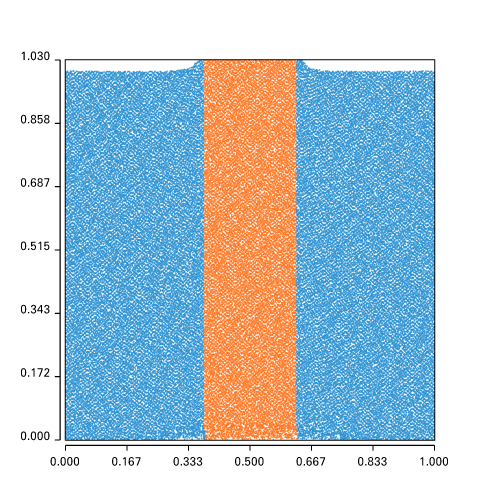

In [9]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")


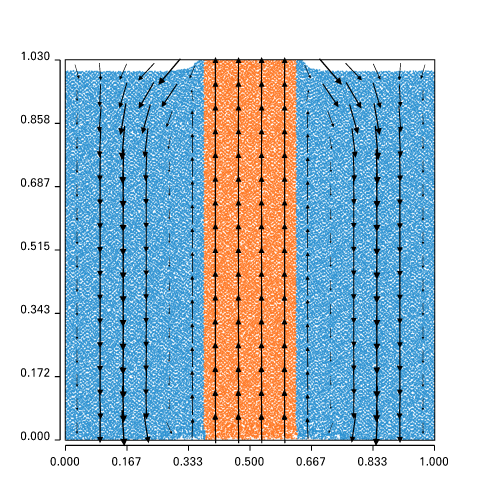

In [10]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

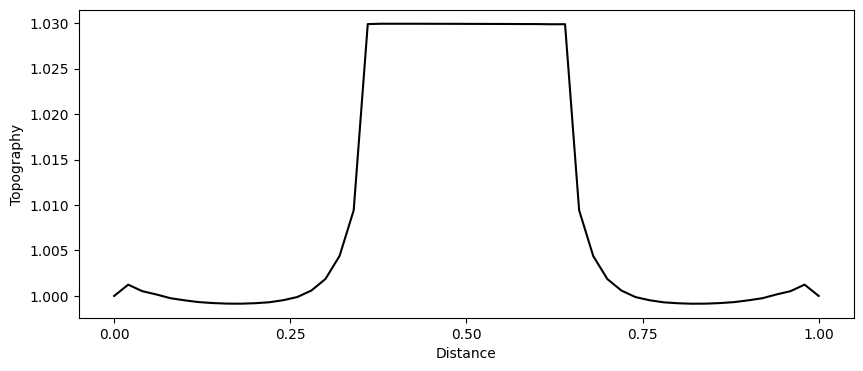

In [11]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [12]:
coords[:,1].mean()

1.0092812294112394

In [13]:
1/0.95*0.25+0.75

1.013157894736842

In [17]:
1/0.95

1.0526315789473684

In [14]:
Model.velocityField.evaluate(Model.bottom_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -5.91324294e-06,  -1.77283152e-05],
       [ -9.12563350e-06,  -2.70507478e-05],
       [ -9.46079071e-06,  -3.71720394e-05],
       [ -7.64039287e-06,  -4.47272789e-05],
       [ -5.81861665e-06,  -5.08988091e-05],
       [ -2.00028979e-06,  -5.50575806e-05],
       [  9.05304826e-07,  -5.74147620e-05],
       [  5.46295333e-06,  -5.78665981e-05],
       [  8.69069006e-06,  -5.64166869e-05],
       [  1.32032605e-05,  -5.30507072e-05],
       [  1.59983343e-05,  -4.77630192e-05],
       [  1.96607098e-05,  -4.06856379e-05],
       [  2.13820805e-05,  -3.16327947e-05],
       [  2.32931763e-05,  -2.09792692e-05],
       [  2.31421565e-05,  -8.11811878e-06],
       [  2.18123932e-05,   5.52130684e-06],
       [  1.95008455e-05,   2.33704991e-05],
       [  1.06915660e-05,   3.97319907e-05],
       [ -8.16896564e-07,   5.14585142e-05],
       [ -8.17795900e-07,   5.14386544e-05],
       [ -8.18969558e-07,   5.14185024e-05],
       [ -

In [15]:
Model.velocityField.evaluate(Model.top_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [  5.48299892e-06,  -2.18715687e-05],
       [  9.64712187e-06,  -2.75592756e-05],
       [  7.53070551e-06,  -3.04725143e-05],
       [  5.28388491e-06,  -3.01462032e-05],
       [  1.16145785e-06,  -2.94157119e-05],
       [ -2.92657044e-06,  -2.83366939e-05],
       [ -8.01483159e-06,  -2.75471566e-05],
       [ -1.28374212e-05,  -2.70558166e-05],
       [ -1.81585146e-05,  -2.71387290e-05],
       [ -2.29826048e-05,  -2.78548521e-05],
       [ -2.78129238e-05,  -2.95678741e-05],
       [ -3.18972029e-05,  -3.24556529e-05],
       [ -3.51930166e-05,  -3.72371461e-05],
       [ -3.73081531e-05,  -4.38844026e-05],
       [ -3.59288384e-05,  -5.33576569e-05],
       [ -3.01004014e-05,  -6.06087390e-05],
       [ -9.95414035e-06,  -6.00258225e-05],
       [  2.35815514e-07,   5.07943063e-05],
       [  2.97226046e-07,   5.09525909e-05],
       [  3.24707229e-07,   5.09666649e-05],
       [  3.50117995e-07,   5.09610202e-05],
       [  


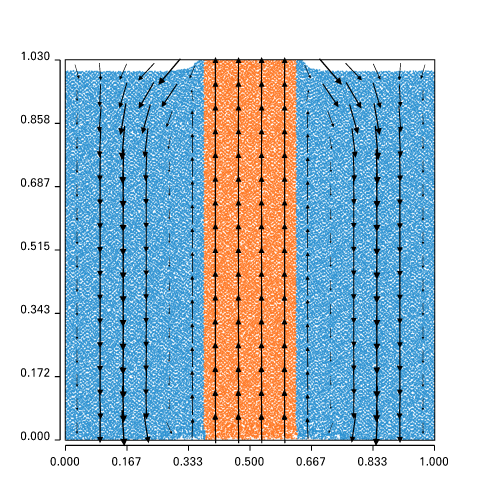

In [16]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")